In [1]:
from InceptionV3 import inceptionV3
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import InterpolationMode
import matplotlib.pyplot as plt

D:\miniconda3\envs\cnn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = inceptionV3()
model

InceptionV3(
  (Conv2d_1a_3x3): BasicConv2D(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (Conv2d_2a_3x3): BasicConv2D(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (Conv2d_2b_3x3): BasicConv2D(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (Conv2d_3b_1x1): BasicConv2D(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1))
    (bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (Conv2d_4a_3x3): BasicConv2D(
    (conv): Conv2d(80, 192, kern

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.2435, 0.2616]),
])

In [4]:
train_dataset = datasets.CIFAR100(root='../data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR100(root='../data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
model = inceptionV3().cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=5e-4)

num_epochs = 100
train_loss, train_acc, test_loss, test_acc = [], [], [], []
best_val_loss = float('inf')
save_path = './AlexNet.pth'

In [6]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    temp_loss, temp_correct = 0, 0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        temp_correct += (predicted == labels).sum().item()
        temp_loss += loss
    print(
        'Epoch {}|{}, Train Loss:{:.4f}, Train Acc:{:.2f}%'.format(epoch + 1, num_epochs, temp_loss / len(train_loader),
                                                                   temp_correct / len(train_dataset) * 100))
    train_loss.append(temp_loss / len(train_loader))
    train_acc.append(temp_correct / len(train_dataset))

    temp_loss, temp_correct = 0, 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            temp_correct += (predicted == labels).sum().item()
            temp_loss += loss
    print('Epoch {}|{}, Test Loss:{:.4f}, Test Acc:{:.2f}%'.format(epoch + 1, num_epochs, temp_loss / len(test_loader),
                                                                   temp_correct / len(test_dataset) * 100))
    test_loss.append(temp_loss / len(test_loader))
    test_acc.append(temp_correct / len(test_dataset))

    if temp_loss < best_val_loss:
        best_val_loss = temp_loss
        torch.save(model.state_dict(), save_path)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 1|100, Train Loss:5.3164, Train Acc:1.20%


  1%|▊                                                                              | 1/100 [01:49<3:00:42, 109.52s/it]

Epoch 1|100, Test Loss:16.1318, Test Acc:1.48%
Epoch 2|100, Train Loss:5.2229, Train Acc:1.57%


  2%|█▌                                                                             | 2/100 [03:37<2:57:30, 108.68s/it]

Epoch 2|100, Test Loss:5.7078, Test Acc:1.92%
Epoch 3|100, Train Loss:5.1768, Train Acc:1.91%


  3%|██▎                                                                            | 3/100 [05:27<2:56:38, 109.26s/it]

Epoch 3|100, Test Loss:11.6610, Test Acc:1.66%
Epoch 4|100, Train Loss:5.1109, Train Acc:2.18%


  4%|███▏                                                                           | 4/100 [07:17<2:55:30, 109.69s/it]

Epoch 4|100, Test Loss:5.1080, Test Acc:3.01%
Epoch 5|100, Train Loss:5.0646, Train Acc:2.60%


  5%|███▉                                                                           | 5/100 [09:07<2:53:31, 109.60s/it]

Epoch 5|100, Test Loss:5.1479, Test Acc:3.25%
Epoch 6|100, Train Loss:4.9520, Train Acc:3.61%


  6%|████▋                                                                          | 6/100 [10:57<2:51:59, 109.78s/it]

Epoch 6|100, Test Loss:5.4707, Test Acc:3.54%
Epoch 7|100, Train Loss:4.8983, Train Acc:4.76%


  7%|█████▌                                                                         | 7/100 [12:48<2:50:32, 110.03s/it]

Epoch 7|100, Test Loss:49.3611, Test Acc:4.04%
Epoch 8|100, Train Loss:4.8323, Train Acc:5.31%


  8%|██████▎                                                                        | 8/100 [14:38<2:48:49, 110.10s/it]

Epoch 8|100, Test Loss:4.3463, Test Acc:6.77%
Epoch 9|100, Train Loss:4.4371, Train Acc:7.33%


  9%|███████                                                                        | 9/100 [16:29<2:47:26, 110.40s/it]

Epoch 9|100, Test Loss:4.3182, Test Acc:8.38%
Epoch 10|100, Train Loss:4.3480, Train Acc:8.98%


 10%|███████▊                                                                      | 10/100 [18:23<2:47:30, 111.67s/it]

Epoch 10|100, Test Loss:737.4813, Test Acc:5.05%
Epoch 11|100, Train Loss:4.2805, Train Acc:9.42%


 11%|████████▌                                                                     | 11/100 [20:15<2:45:30, 111.58s/it]

Epoch 11|100, Test Loss:3.9045, Test Acc:13.04%
Epoch 12|100, Train Loss:4.0495, Train Acc:12.82%


 12%|█████████▎                                                                    | 12/100 [22:05<2:43:15, 111.32s/it]

Epoch 12|100, Test Loss:3.8081, Test Acc:15.63%
Epoch 13|100, Train Loss:3.9840, Train Acc:14.66%


 13%|██████████▏                                                                   | 13/100 [23:57<2:41:24, 111.32s/it]

Epoch 13|100, Test Loss:3.6714, Test Acc:17.15%
Epoch 14|100, Train Loss:3.8757, Train Acc:16.40%


 14%|██████████▉                                                                   | 14/100 [25:48<2:39:29, 111.27s/it]

Epoch 14|100, Test Loss:4.3720, Test Acc:17.16%
Epoch 15|100, Train Loss:3.8425, Train Acc:17.91%


 15%|███████████▋                                                                  | 15/100 [27:39<2:37:25, 111.13s/it]

Epoch 15|100, Test Loss:20.7485, Test Acc:19.43%
Epoch 16|100, Train Loss:3.7451, Train Acc:19.97%


 16%|████████████▍                                                                 | 16/100 [29:30<2:35:48, 111.29s/it]

Epoch 16|100, Test Loss:3.2844, Test Acc:22.54%
Epoch 17|100, Train Loss:3.6109, Train Acc:21.66%


 17%|█████████████▎                                                                | 17/100 [31:22<2:33:55, 111.27s/it]

Epoch 17|100, Test Loss:3.2088, Test Acc:23.18%
Epoch 18|100, Train Loss:3.5404, Train Acc:23.30%


 18%|██████████████                                                                | 18/100 [33:13<2:32:10, 111.34s/it]

Epoch 18|100, Test Loss:3.1923, Test Acc:27.14%
Epoch 19|100, Train Loss:3.3868, Train Acc:25.26%


 19%|██████████████▊                                                               | 19/100 [35:04<2:30:17, 111.32s/it]

Epoch 19|100, Test Loss:3.2981, Test Acc:28.11%
Epoch 20|100, Train Loss:3.2411, Train Acc:27.43%


 20%|███████████████▌                                                              | 20/100 [36:54<2:27:35, 110.69s/it]

Epoch 20|100, Test Loss:3.6478, Test Acc:29.69%
Epoch 21|100, Train Loss:3.1536, Train Acc:29.31%


 21%|████████████████▍                                                             | 21/100 [38:43<2:25:08, 110.23s/it]

Epoch 21|100, Test Loss:3.0412, Test Acc:31.13%
Epoch 22|100, Train Loss:3.1020, Train Acc:30.44%


 22%|█████████████████▏                                                            | 22/100 [40:30<2:21:59, 109.22s/it]

Epoch 22|100, Test Loss:3.1118, Test Acc:32.60%
Epoch 23|100, Train Loss:3.0057, Train Acc:32.58%


 23%|█████████████████▉                                                            | 23/100 [42:17<2:19:18, 108.55s/it]

Epoch 23|100, Test Loss:3.2261, Test Acc:33.96%
Epoch 24|100, Train Loss:2.8376, Train Acc:34.38%


 24%|██████████████████▋                                                           | 24/100 [44:03<2:16:36, 107.85s/it]

Epoch 24|100, Test Loss:16.9624, Test Acc:34.66%
Epoch 25|100, Train Loss:2.7886, Train Acc:36.58%


 25%|███████████████████▌                                                          | 25/100 [45:50<2:14:38, 107.71s/it]

Epoch 25|100, Test Loss:3.0455, Test Acc:37.23%
Epoch 26|100, Train Loss:2.6578, Train Acc:38.53%


 26%|████████████████████▎                                                         | 26/100 [47:37<2:12:19, 107.29s/it]

Epoch 26|100, Test Loss:5.7092, Test Acc:35.44%
Epoch 27|100, Train Loss:2.5795, Train Acc:40.38%


 27%|█████████████████████                                                         | 27/100 [49:24<2:10:26, 107.21s/it]

Epoch 27|100, Test Loss:2.8015, Test Acc:39.93%
Epoch 28|100, Train Loss:2.4129, Train Acc:42.73%


 28%|█████████████████████▊                                                        | 28/100 [51:10<2:08:25, 107.02s/it]

Epoch 28|100, Test Loss:2.5583, Test Acc:40.35%
Epoch 29|100, Train Loss:2.3451, Train Acc:44.75%


 29%|██████████████████████▌                                                       | 29/100 [52:57<2:06:25, 106.84s/it]

Epoch 29|100, Test Loss:2.4598, Test Acc:42.02%
Epoch 30|100, Train Loss:2.2029, Train Acc:46.80%


 30%|███████████████████████▍                                                      | 30/100 [54:43<2:04:36, 106.81s/it]

Epoch 30|100, Test Loss:3.8871, Test Acc:42.42%
Epoch 31|100, Train Loss:2.0791, Train Acc:49.32%


 31%|████████████████████████▏                                                     | 31/100 [56:30<2:02:48, 106.79s/it]

Epoch 31|100, Test Loss:4.1846, Test Acc:42.82%
Epoch 32|100, Train Loss:2.1223, Train Acc:48.58%


 32%|████████████████████████▉                                                     | 32/100 [58:18<2:01:20, 107.07s/it]

Epoch 32|100, Test Loss:2.2148, Test Acc:43.58%
Epoch 33|100, Train Loss:2.0332, Train Acc:49.46%


 33%|█████████████████████████                                                   | 33/100 [1:00:06<1:59:47, 107.27s/it]

Epoch 33|100, Test Loss:7.0749, Test Acc:42.41%
Epoch 34|100, Train Loss:1.8662, Train Acc:51.95%


 34%|█████████████████████████▊                                                  | 34/100 [1:01:54<1:58:18, 107.55s/it]

Epoch 34|100, Test Loss:2.8765, Test Acc:38.70%
Epoch 35|100, Train Loss:1.8522, Train Acc:52.98%


 35%|██████████████████████████▌                                                 | 35/100 [1:03:40<1:56:09, 107.22s/it]

Epoch 35|100, Test Loss:2.5485, Test Acc:43.59%
Epoch 36|100, Train Loss:1.7264, Train Acc:55.47%


 36%|███████████████████████████▎                                                | 36/100 [1:05:26<1:54:02, 106.92s/it]

Epoch 36|100, Test Loss:2.2518, Test Acc:46.48%
Epoch 37|100, Train Loss:1.4871, Train Acc:59.83%


 37%|████████████████████████████                                                | 37/100 [1:07:12<1:51:51, 106.54s/it]

Epoch 37|100, Test Loss:2.7390, Test Acc:44.07%
Epoch 38|100, Train Loss:1.5410, Train Acc:60.00%


 38%|████████████████████████████▉                                               | 38/100 [1:08:59<1:50:09, 106.60s/it]

Epoch 38|100, Test Loss:2.8571, Test Acc:44.53%
Epoch 39|100, Train Loss:1.3641, Train Acc:63.77%


 39%|█████████████████████████████▋                                              | 39/100 [1:10:45<1:48:15, 106.48s/it]

Epoch 39|100, Test Loss:2.2637, Test Acc:46.05%
Epoch 40|100, Train Loss:1.2634, Train Acc:65.65%


 40%|██████████████████████████████▍                                             | 40/100 [1:12:31<1:46:22, 106.38s/it]

Epoch 40|100, Test Loss:2.5537, Test Acc:45.67%
Epoch 41|100, Train Loss:1.1332, Train Acc:68.48%


 41%|███████████████████████████████▏                                            | 41/100 [1:14:18<1:44:54, 106.68s/it]

Epoch 41|100, Test Loss:2.4421, Test Acc:45.78%
Epoch 42|100, Train Loss:1.0569, Train Acc:69.83%


 42%|███████████████████████████████▉                                            | 42/100 [1:16:05<1:43:04, 106.63s/it]

Epoch 42|100, Test Loss:2.4363, Test Acc:46.08%
Epoch 43|100, Train Loss:0.9226, Train Acc:72.35%


 43%|████████████████████████████████▋                                           | 43/100 [1:17:51<1:41:13, 106.56s/it]

Epoch 43|100, Test Loss:2.6105, Test Acc:45.34%
Epoch 44|100, Train Loss:0.8151, Train Acc:74.61%


 44%|█████████████████████████████████▍                                          | 44/100 [1:19:38<1:39:35, 106.70s/it]

Epoch 44|100, Test Loss:2.8352, Test Acc:44.13%
Epoch 45|100, Train Loss:0.6739, Train Acc:78.79%


 45%|██████████████████████████████████▏                                         | 45/100 [1:21:26<1:38:00, 106.91s/it]

Epoch 45|100, Test Loss:2.6340, Test Acc:46.13%
Epoch 46|100, Train Loss:0.5662, Train Acc:81.93%


 46%|██████████████████████████████████▉                                         | 46/100 [1:23:12<1:36:06, 106.79s/it]

Epoch 46|100, Test Loss:2.6344, Test Acc:46.61%
Epoch 47|100, Train Loss:0.4715, Train Acc:85.03%


 47%|███████████████████████████████████▋                                        | 47/100 [1:24:59<1:34:21, 106.83s/it]

Epoch 47|100, Test Loss:2.7158, Test Acc:45.50%
Epoch 48|100, Train Loss:0.3755, Train Acc:87.89%


 48%|████████████████████████████████████▍                                       | 48/100 [1:26:46<1:32:33, 106.79s/it]

Epoch 48|100, Test Loss:2.8745, Test Acc:45.92%
Epoch 49|100, Train Loss:0.3230, Train Acc:89.53%


 49%|█████████████████████████████████████▏                                      | 49/100 [1:28:33<1:30:45, 106.77s/it]

Epoch 49|100, Test Loss:2.8245, Test Acc:46.93%
Epoch 50|100, Train Loss:0.2942, Train Acc:90.71%


 50%|██████████████████████████████████████                                      | 50/100 [1:30:20<1:29:13, 107.06s/it]

Epoch 50|100, Test Loss:2.8242, Test Acc:46.43%
Epoch 51|100, Train Loss:0.2309, Train Acc:92.88%


 51%|██████████████████████████████████████▊                                     | 51/100 [1:32:07<1:27:19, 106.94s/it]

Epoch 51|100, Test Loss:2.8374, Test Acc:46.61%
Epoch 52|100, Train Loss:0.2013, Train Acc:93.76%


 52%|███████████████████████████████████████▌                                    | 52/100 [1:33:53<1:25:15, 106.58s/it]

Epoch 52|100, Test Loss:3.1073, Test Acc:46.27%
Epoch 53|100, Train Loss:0.1596, Train Acc:95.29%


 53%|████████████████████████████████████████▎                                   | 53/100 [1:35:38<1:23:15, 106.29s/it]

Epoch 53|100, Test Loss:2.8631, Test Acc:47.56%
Epoch 54|100, Train Loss:0.1357, Train Acc:96.01%


 54%|█████████████████████████████████████████                                   | 54/100 [1:37:25<1:21:28, 106.26s/it]

Epoch 54|100, Test Loss:2.8223, Test Acc:47.88%
Epoch 55|100, Train Loss:0.1204, Train Acc:96.43%


 55%|█████████████████████████████████████████▊                                  | 55/100 [1:39:12<1:19:53, 106.53s/it]

Epoch 55|100, Test Loss:2.9515, Test Acc:47.02%
Epoch 56|100, Train Loss:0.1126, Train Acc:96.75%


 56%|██████████████████████████████████████████▌                                 | 56/100 [1:40:59<1:18:13, 106.67s/it]

Epoch 56|100, Test Loss:2.9722, Test Acc:47.18%
Epoch 57|100, Train Loss:0.0867, Train Acc:97.69%


 57%|███████████████████████████████████████████▎                                | 57/100 [1:42:46<1:16:31, 106.78s/it]

Epoch 57|100, Test Loss:2.9242, Test Acc:47.50%
Epoch 58|100, Train Loss:0.0751, Train Acc:98.02%


 58%|████████████████████████████████████████████                                | 58/100 [1:44:32<1:14:41, 106.70s/it]

Epoch 58|100, Test Loss:2.9570, Test Acc:47.65%
Epoch 59|100, Train Loss:0.0683, Train Acc:98.27%


 59%|████████████████████████████████████████████▊                               | 59/100 [1:46:18<1:12:47, 106.53s/it]

Epoch 59|100, Test Loss:2.9817, Test Acc:48.33%
Epoch 60|100, Train Loss:0.0553, Train Acc:98.67%


 60%|█████████████████████████████████████████████▌                              | 60/100 [1:48:05<1:11:02, 106.56s/it]

Epoch 60|100, Test Loss:2.9426, Test Acc:47.98%
Epoch 61|100, Train Loss:0.0450, Train Acc:98.98%


 61%|██████████████████████████████████████████████▎                             | 61/100 [1:49:52<1:09:17, 106.61s/it]

Epoch 61|100, Test Loss:3.0333, Test Acc:47.24%
Epoch 62|100, Train Loss:0.0414, Train Acc:99.14%


 62%|███████████████████████████████████████████████                             | 62/100 [1:51:39<1:07:37, 106.76s/it]

Epoch 62|100, Test Loss:2.8907, Test Acc:48.06%
Epoch 63|100, Train Loss:0.0375, Train Acc:99.17%


 63%|███████████████████████████████████████████████▉                            | 63/100 [1:53:25<1:05:44, 106.61s/it]

Epoch 63|100, Test Loss:2.9435, Test Acc:48.49%
Epoch 64|100, Train Loss:0.0287, Train Acc:99.41%


 64%|████████████████████████████████████████████████▋                           | 64/100 [1:55:13<1:04:13, 107.05s/it]

Epoch 64|100, Test Loss:2.9292, Test Acc:48.92%
Epoch 65|100, Train Loss:0.0211, Train Acc:99.64%


 65%|█████████████████████████████████████████████████▍                          | 65/100 [1:57:01<1:02:38, 107.39s/it]

Epoch 65|100, Test Loss:2.8685, Test Acc:49.12%
Epoch 66|100, Train Loss:0.0154, Train Acc:99.80%


 66%|██████████████████████████████████████████████████▏                         | 66/100 [1:58:47<1:00:37, 106.98s/it]

Epoch 66|100, Test Loss:2.8206, Test Acc:49.84%
Epoch 67|100, Train Loss:0.0147, Train Acc:99.78%


 67%|████████████████████████████████████████████████████▎                         | 67/100 [2:00:35<58:56, 107.16s/it]

Epoch 67|100, Test Loss:2.8584, Test Acc:49.07%
Epoch 68|100, Train Loss:0.0120, Train Acc:99.85%


 68%|█████████████████████████████████████████████████████                         | 68/100 [2:02:22<57:04, 107.02s/it]

Epoch 68|100, Test Loss:2.7969, Test Acc:49.62%
Epoch 69|100, Train Loss:0.0083, Train Acc:99.92%


 69%|█████████████████████████████████████████████████████▊                        | 69/100 [2:04:08<55:07, 106.69s/it]

Epoch 69|100, Test Loss:2.7956, Test Acc:50.05%
Epoch 70|100, Train Loss:0.0081, Train Acc:99.91%


 70%|██████████████████████████████████████████████████████▌                       | 70/100 [2:05:54<53:14, 106.49s/it]

Epoch 70|100, Test Loss:2.7312, Test Acc:50.29%
Epoch 71|100, Train Loss:0.0072, Train Acc:99.93%


 71%|███████████████████████████████████████████████████████▍                      | 71/100 [2:07:40<51:25, 106.38s/it]

Epoch 71|100, Test Loss:2.7562, Test Acc:50.00%
Epoch 72|100, Train Loss:0.0065, Train Acc:99.93%


 72%|████████████████████████████████████████████████████████▏                     | 72/100 [2:09:26<49:34, 106.23s/it]

Epoch 72|100, Test Loss:2.7303, Test Acc:50.36%
Epoch 73|100, Train Loss:0.0055, Train Acc:99.95%


 73%|████████████████████████████████████████████████████████▉                     | 73/100 [2:11:12<47:47, 106.22s/it]

Epoch 73|100, Test Loss:2.7339, Test Acc:49.84%
Epoch 74|100, Train Loss:0.0055, Train Acc:99.95%


 74%|█████████████████████████████████████████████████████████▋                    | 74/100 [2:12:59<46:05, 106.38s/it]

Epoch 74|100, Test Loss:2.7186, Test Acc:50.13%
Epoch 75|100, Train Loss:0.0065, Train Acc:99.93%


 75%|██████████████████████████████████████████████████████████▌                   | 75/100 [2:14:46<44:25, 106.61s/it]

Epoch 75|100, Test Loss:2.6874, Test Acc:49.95%
Epoch 76|100, Train Loss:0.0046, Train Acc:99.97%


 76%|███████████████████████████████████████████████████████████▎                  | 76/100 [2:16:31<42:32, 106.34s/it]

Epoch 76|100, Test Loss:2.6775, Test Acc:49.86%
Epoch 77|100, Train Loss:0.0049, Train Acc:99.96%


 77%|████████████████████████████████████████████████████████████                  | 77/100 [2:18:17<40:38, 106.02s/it]

Epoch 77|100, Test Loss:2.6858, Test Acc:49.97%
Epoch 78|100, Train Loss:0.0046, Train Acc:99.97%


 78%|████████████████████████████████████████████████████████████▊                 | 78/100 [2:20:04<39:00, 106.40s/it]

Epoch 78|100, Test Loss:2.6682, Test Acc:49.52%
Epoch 79|100, Train Loss:0.0045, Train Acc:99.96%


 79%|█████████████████████████████████████████████████████████████▌                | 79/100 [2:21:50<37:14, 106.40s/it]

Epoch 79|100, Test Loss:2.6268, Test Acc:50.17%
Epoch 80|100, Train Loss:0.0040, Train Acc:99.96%


 80%|██████████████████████████████████████████████████████████████▍               | 80/100 [2:23:37<35:26, 106.33s/it]

Epoch 80|100, Test Loss:2.5960, Test Acc:50.22%
Epoch 81|100, Train Loss:0.0039, Train Acc:99.97%


 81%|███████████████████████████████████████████████████████████████▏              | 81/100 [2:25:24<33:46, 106.67s/it]

Epoch 81|100, Test Loss:2.5999, Test Acc:49.76%
Epoch 82|100, Train Loss:0.0042, Train Acc:99.97%


 82%|███████████████████████████████████████████████████████████████▉              | 82/100 [2:27:11<32:01, 106.74s/it]

Epoch 82|100, Test Loss:2.6098, Test Acc:49.71%
Epoch 83|100, Train Loss:0.0040, Train Acc:99.96%


 83%|████████████████████████████████████████████████████████████████▋             | 83/100 [2:28:57<30:12, 106.63s/it]

Epoch 83|100, Test Loss:2.5631, Test Acc:50.00%
Epoch 84|100, Train Loss:0.0041, Train Acc:99.96%


 84%|█████████████████████████████████████████████████████████████████▌            | 84/100 [2:30:44<28:25, 106.62s/it]

Epoch 84|100, Test Loss:2.5575, Test Acc:50.01%
Epoch 85|100, Train Loss:0.0049, Train Acc:99.96%


 85%|██████████████████████████████████████████████████████████████████▎           | 85/100 [2:32:32<26:44, 106.99s/it]

Epoch 85|100, Test Loss:2.5417, Test Acc:49.93%
Epoch 86|100, Train Loss:0.0043, Train Acc:99.97%


 86%|███████████████████████████████████████████████████████████████████           | 86/100 [2:34:18<24:56, 106.89s/it]

Epoch 86|100, Test Loss:2.5533, Test Acc:50.18%
Epoch 87|100, Train Loss:0.0045, Train Acc:99.96%


 87%|███████████████████████████████████████████████████████████████████▊          | 87/100 [2:36:06<23:13, 107.23s/it]

Epoch 87|100, Test Loss:2.5364, Test Acc:50.21%
Epoch 88|100, Train Loss:0.0045, Train Acc:99.96%


 88%|████████████████████████████████████████████████████████████████████▋         | 88/100 [2:37:54<21:26, 107.21s/it]

Epoch 88|100, Test Loss:2.5355, Test Acc:49.73%
Epoch 89|100, Train Loss:0.0050, Train Acc:99.96%


 89%|█████████████████████████████████████████████████████████████████████▍        | 89/100 [2:39:40<19:37, 107.00s/it]

Epoch 89|100, Test Loss:2.5130, Test Acc:49.72%
Epoch 90|100, Train Loss:0.0049, Train Acc:99.96%


 90%|██████████████████████████████████████████████████████████████████████▏       | 90/100 [2:41:27<17:49, 106.98s/it]

Epoch 90|100, Test Loss:2.4961, Test Acc:49.81%
Epoch 91|100, Train Loss:0.0043, Train Acc:99.97%


 91%|██████████████████████████████████████████████████████████████████████▉       | 91/100 [2:43:15<16:04, 107.18s/it]

Epoch 91|100, Test Loss:2.4949, Test Acc:49.45%
Epoch 92|100, Train Loss:0.0051, Train Acc:99.97%


 92%|███████████████████████████████████████████████████████████████████████▊      | 92/100 [2:45:02<14:17, 107.20s/it]

Epoch 92|100, Test Loss:2.4868, Test Acc:49.59%
Epoch 93|100, Train Loss:0.0043, Train Acc:99.96%


 93%|████████████████████████████████████████████████████████████████████████▌     | 93/100 [2:46:49<12:30, 107.19s/it]

Epoch 93|100, Test Loss:2.5118, Test Acc:49.67%
Epoch 94|100, Train Loss:0.0045, Train Acc:99.97%


 94%|█████████████████████████████████████████████████████████████████████████▎    | 94/100 [2:48:37<10:44, 107.49s/it]

Epoch 94|100, Test Loss:2.4620, Test Acc:49.59%
Epoch 95|100, Train Loss:0.0054, Train Acc:99.96%


 95%|██████████████████████████████████████████████████████████████████████████    | 95/100 [2:50:27<09:01, 108.29s/it]

Epoch 95|100, Test Loss:2.4755, Test Acc:49.25%
Epoch 96|100, Train Loss:0.0052, Train Acc:99.96%


 96%|██████████████████████████████████████████████████████████████████████████▉   | 96/100 [2:52:16<07:13, 108.34s/it]

Epoch 96|100, Test Loss:2.4687, Test Acc:49.42%
Epoch 97|100, Train Loss:0.0045, Train Acc:99.97%


 97%|███████████████████████████████████████████████████████████████████████████▋  | 97/100 [2:54:06<05:26, 108.78s/it]

Epoch 97|100, Test Loss:2.4697, Test Acc:49.12%
Epoch 98|100, Train Loss:0.0045, Train Acc:99.97%


 98%|████████████████████████████████████████████████████████████████████████████▍ | 98/100 [2:55:55<03:37, 109.00s/it]

Epoch 98|100, Test Loss:2.4639, Test Acc:49.09%
Epoch 99|100, Train Loss:0.0045, Train Acc:99.96%


 99%|█████████████████████████████████████████████████████████████████████████████▏| 99/100 [2:57:45<01:49, 109.31s/it]

Epoch 99|100, Test Loss:2.4609, Test Acc:48.98%
Epoch 100|100, Train Loss:0.0046, Train Acc:99.96%


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [2:59:34<00:00, 107.75s/it]

Epoch 100|100, Test Loss:2.4594, Test Acc:49.04%


In [7]:
train_loss = [float(loss) for loss in train_loss]
print(train_loss)
test_loss = [float(loss) for loss in test_loss]
print(test_loss)

[5.316422939300537, 5.222929954528809, 5.176801681518555, 5.110921859741211, 5.064579963684082, 4.9519805908203125, 4.898279666900635, 4.832307815551758, 4.437054634094238, 4.347993850708008, 4.280548095703125, 4.049479961395264, 3.9840424060821533, 3.875673770904541, 3.8424787521362305, 3.745112657546997, 3.6109297275543213, 3.540447235107422, 3.3868472576141357, 3.241098403930664, 3.153594493865967, 3.1020495891571045, 3.005682945251465, 2.8375914096832275, 2.78859281539917, 2.657825231552124, 2.579540967941284, 2.4128997325897217, 2.3451406955718994, 2.202895402908325, 2.0791397094726562, 2.122281789779663, 2.0332255363464355, 1.8661885261535645, 1.852237582206726, 1.7263630628585815, 1.4870718717575073, 1.540959119796753, 1.3640532493591309, 1.2633640766143799, 1.133244514465332, 1.0569216012954712, 0.9226118326187134, 0.8151305913925171, 0.6739285588264465, 0.5662105083465576, 0.47147056460380554, 0.37545737624168396, 0.32304102182388306, 0.2942039370536804, 0.23090317845344543, 0

In [8]:
df = pd.DataFrame({
    'train_loss': train_loss,
    'train_acc': train_acc,
    'test_loss': test_loss,
    'test_acc': test_acc
})
df.to_csv('experiment.csv', index=False)

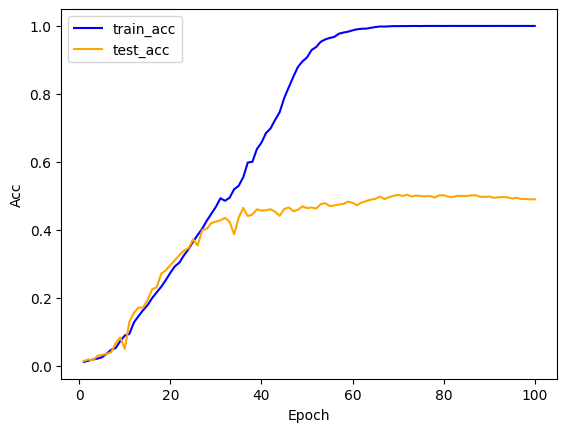

In [9]:
epoch = [i+1 for i in range(num_epochs)]
plt.plot(epoch, train_acc, color='blue', label='train_acc')
plt.plot(epoch, test_acc, color='orange', label='test_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

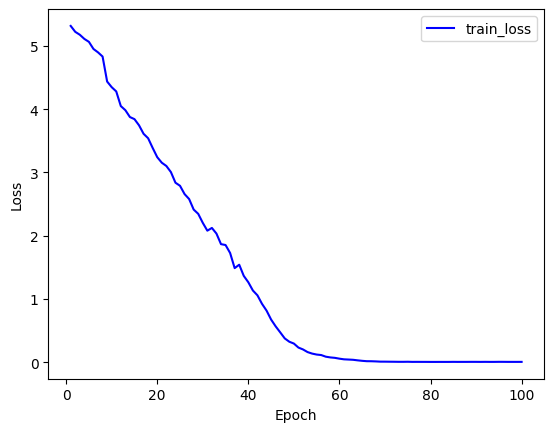

In [12]:
epoch = [i+1 for i in range(num_epochs)]
plt.plot(epoch, train_loss, color='blue', label='train_loss')
# plt.plot(epoch, test_loss, color='orange', label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

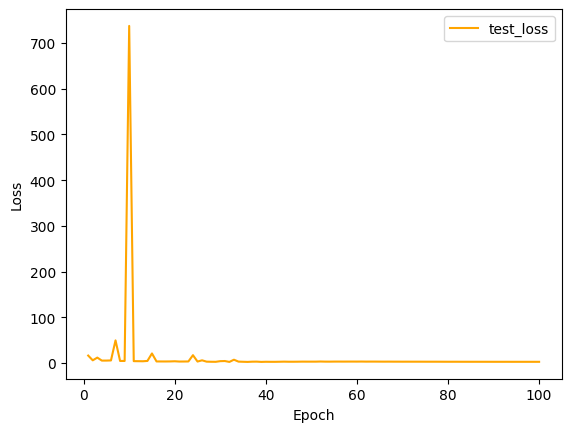

In [13]:
epoch = [i+1 for i in range(num_epochs)]
# plt.plot(epoch, train_loss, color='blue', label='train_loss')
plt.plot(epoch, test_loss, color='orange', label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()